# filling the missing data 

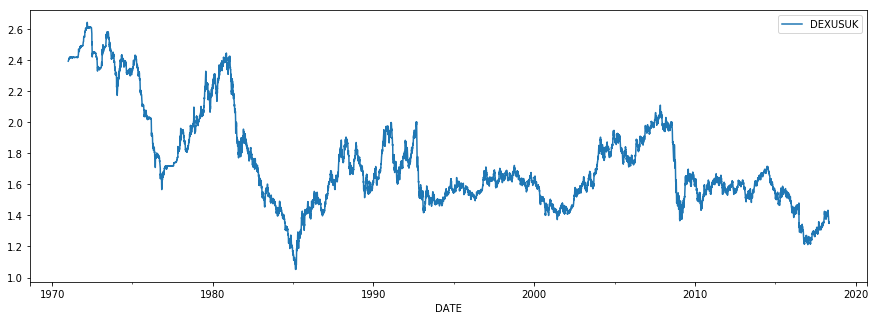

In [2]:
#missing data filled
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#get_ipython().magic('matplotlib inline')

df = pd.read_csv('desu.csv')
df_null = df['DEXUSUK'].isnull()
df_null[df_null==True].count() #'0' means No Null values
df[df.DEXUSUK=='.']
df[df.DEXUSUK=='.'].count()
df_missing = df.DEXUSUK[df.DEXUSUK=='.']
missing_indexes = np.array(df_missing.index).astype(int)

for i in missing_indexes:
    if df.DEXUSUK[i+5]=='.':
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+6]))/2
    elif df.DEXUSUK[i+4]=='.':
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+5]))/2
    elif df.DEXUSUK[i+3]=='.':
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+4]))/2
    elif df.DEXUSUK[i+2]=='.':
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+3]))/2
    elif df.DEXUSUK[i+1]=='.':
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+2]))/2
    else :
        df.DEXUSUK[i] = (float(df.DEXUSUK[i-1]) + float(df.DEXUSUK[i+1]))/2
# check for missing values

df.DATE = pd.to_datetime(df.DATE)
df.DEXUSUK = pd.to_numeric(df.DEXUSUK)
df.set_index('DATE',inplace=True)

df.plot(y='DEXUSUK',figsize=(15,5))


In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
df.index

DatetimeIndex(['1971-01-04', '1971-01-05', '1971-01-06', '1971-01-07',
               '1971-01-08', '1971-01-11', '1971-01-12', '1971-01-13',
               '1971-01-14', '1971-01-15',
               ...
               '2018-04-30', '2018-05-01', '2018-05-02', '2018-05-03',
               '2018-05-04', '2018-05-07', '2018-05-08', '2018-05-09',
               '2018-05-10', '2018-05-11'],
              dtype='datetime64[ns]', name='DATE', length=12355, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12355 entries, 1971-01-04 to 2018-05-11
Data columns (total 1 columns):
DEXUSUK    12355 non-null float64
dtypes: float64(1)
memory usage: 193.0 KB


In [6]:
df.describe()

,DEXUSUK
count,12355.000000
mean,1.738982
std,0.314593
min,1.052000
25%,1.534800
50%,1.642500
75%,1.880775
max,2.644000


In [7]:
#missing dates filled
idx = pd.date_range('1971-01-01', '2018-05-10')
ts=df['DEXUSUK']
s = pd.Series(ts)
s.index = pd.DatetimeIndex(s.index)

s = s.reindex(idx, fill_value="NaN")
s = s.astype(float)

s = s.interpolate(method='linear', axis=0).ffill().bfill()
print(s)

1971-01-01    2.393800
1971-01-02    2.393800
1971-01-03    2.393800
1971-01-04    2.393800
1971-01-05    2.394900
1971-01-06    2.396700
1971-01-07    2.396300
1971-01-08    2.397200
1971-01-09    2.397867
1971-01-10    2.398533
1971-01-11    2.399200
1971-01-12    2.400100
1971-01-13    2.402100
1971-01-14    2.407100
1971-01-15    2.405700
1971-01-16    2.405533
1971-01-17    2.405367
1971-01-18    2.405200
1971-01-19    2.408100
1971-01-20    2.408000
1971-01-21    2.409200
1971-01-22    2.410300
1971-01-23    2.411767
1971-01-24    2.413233
1971-01-25    2.414700
1971-01-26    2.416000
1971-01-27    2.416100
1971-01-28    2.416900
1971-01-29    2.417400
1971-01-30    2.417733
                ...   
2018-04-11    1.419400
2018-04-12    1.424400
2018-04-13    1.425500
2018-04-14    1.428067
2018-04-15    1.430633
2018-04-16    1.433200
2018-04-17    1.430100
2018-04-18    1.422700
2018-04-19    1.419300
2018-04-20    1.403300
2018-04-21    1.400633
2018-04-22    1.397967
2018-04-23 

In [8]:
s.describe()

count    17297.000000
mean         1.739011
std          0.314588
min          1.052000
25%          1.534700
50%          1.642300
75%          1.880500
max          2.644000
Name: DEXUSUK, dtype: float64

In [9]:
df1=s['1971-01']

In [10]:
df1.describe()

count    31.000000
mean      2.405306
std       0.008396
min       2.393800
25%       2.397533
50%       2.405533
75%       2.412500
max       2.418067
Name: DEXUSUK, dtype: float64

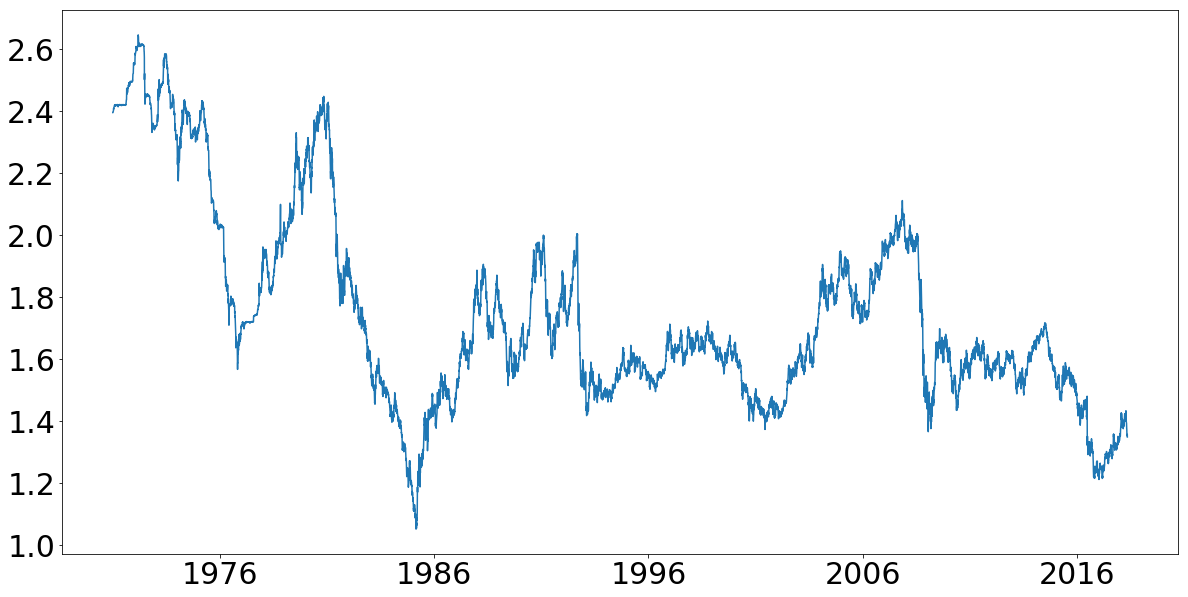

In [11]:
plt.figure(figsize=(20,10))
plt.plot(s)
plt.tick_params(axis='both', which='major', labelsize=30)

# Converting into month-wise data

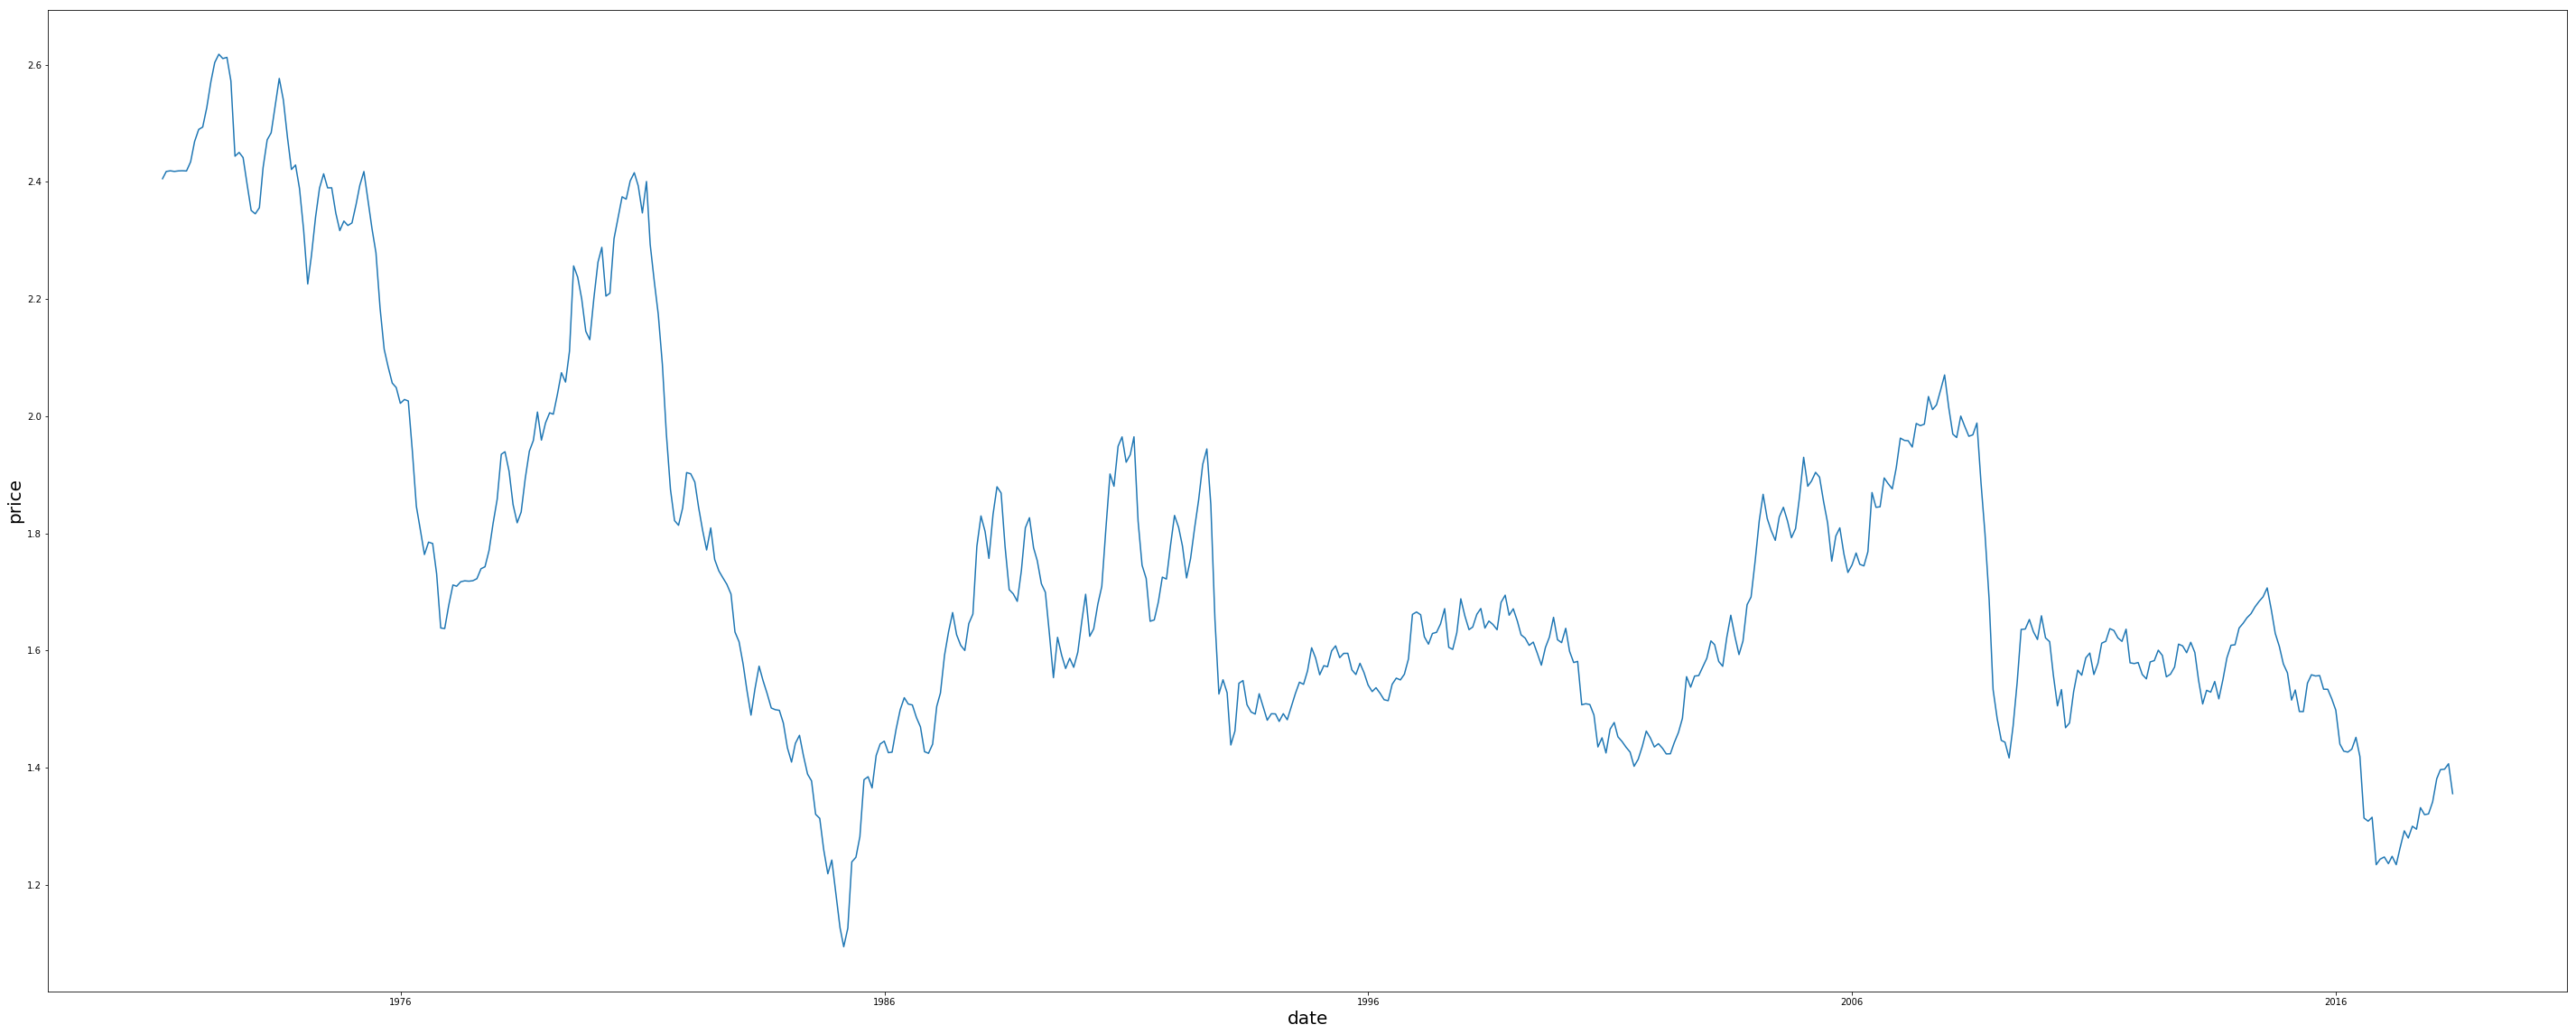

In [12]:
mnth=s.groupby( pd.Grouper( freq='M')).mean()
plt.figure(figsize=(50,20))
plt.xlabel('date',size=20)
plt.ylabel('price',size=20)
plt.plot(mnth)



In [13]:
monthn=mnth

DEXUSUK                                                              \
Year       1971      1972      1973      1974      1975      1976      1977   
month                                                                         
1      2.405306  2.570852  2.355758  2.225565  2.361471  2.028460  1.711874   
2      2.417670  2.603583  2.424311  2.274170  2.393898  2.025891  1.709714   
3      2.418794  2.617787  2.471742  2.339452  2.417558  1.939694  1.717390   
4      2.417697  2.610347  2.483657  2.389333  2.369400  1.846057  1.718980   
5      2.418616  2.612390  2.530929  2.413645  2.320169  1.804787  1.718345   
6      2.418887  2.572123  2.576414  2.389700  2.278792  1.763817  1.719120   
7      2.418500  2.443723  2.539668  2.389748  2.184587  1.784994  1.722623   
8      2.434111  2.450148  2.475855  2.346444  2.114274  1.782635  1.739629   
9      2.468760  2.441392  2.421043  2.316741  2.084183  1.730987  1.742900   
10     2.489406  2.394849  2.428635  2.332990  2.056500  1.638448  1.771035   
11     2.493385  2.351167  2.388440  2.325456  2.048818  1.637547  1.816815   
12     2.526697  2.345355  2.317806  2.329837  2.021911  1.677768  1.858117   

                                       ...                                   \
Year       1978      1979      1980    ...         2009      2010      2011   
month                                  ...                                    
1      1.934934  2.005724  2.262881    ...     1.446664  1.615058  1.578500   
2      1.939271  2.003357  2.288181    ...     1.443418  1.557861  1.612546   
3      1.905794  2.037603  2.204923    ...     1.416647  1.505513  1.615784   
4      1.848983  2.074217  2.209883    ...     1.471073  1.533377  1.637382   
5      1.818002  2.058156  2.302903    ...     1.546203  1.468235  1.634185   
6      1.836303  2.110947  2.337907    ...     1.636017  1.476340  1.621640   
7      1.893844  2.256456  2.374397    ...     1.636690  1.529794  1.615642   
8      1.940252  2.237116  2.370400    ...     1.652958  1.566452  1.636448   
9      1.958444  2.200287  2.401450    ...     1.632340  1.557873  1.579070   
10     2.007067  2.144861  2.415545    ...     1.618858  1.587565  1.577748   
11     1.959128  2.130542  2.393008    ...     1.659302  1.595645  1.579483   
12     1.988473  2.201455  2.346845    ...     1.621481  1.559074  1.559170   

                                                                             
Year       2012      2013      2014      2015      2016      2017      2018  
month                                                                        
1      1.551640  1.596592  1.646660  1.515451  1.440316  1.236240  1.381179  
2      1.580548  1.549336  1.655789  1.532679  1.428231  1.248775  1.396714  
3      1.582827  1.508742  1.662913  1.495854  1.426655  1.234461  1.397470  
4      1.600552  1.532083  1.674517  1.495777  1.431776  1.263853  1.406754  
5      1.591494  1.528945  1.683869  1.544235  1.451833  1.292248  1.355690  
6      1.555112  1.547123  1.691682  1.558607  1.419023  1.280013       NaN  
7      1.559619  1.517471  1.706906  1.556506  1.314071  1.300105       NaN  
8      1.571848  1.550428  1.669792  1.557277  1.308723  1.295035       NaN  
9      1.610913  1.587451  1.629162  1.533950  1.315393  1.331831       NaN  
10     1.607839  1.609000  1.606803  1.533872  1.234500  1.319880       NaN  
11     1.596307  1.609814  1.577205  1.517914  1.243940  1.321138       NaN  
12     1.614039  1.638341  1.561832  1.498155  1.247656  1.341715       NaN  

[12 rows x 48 columns]

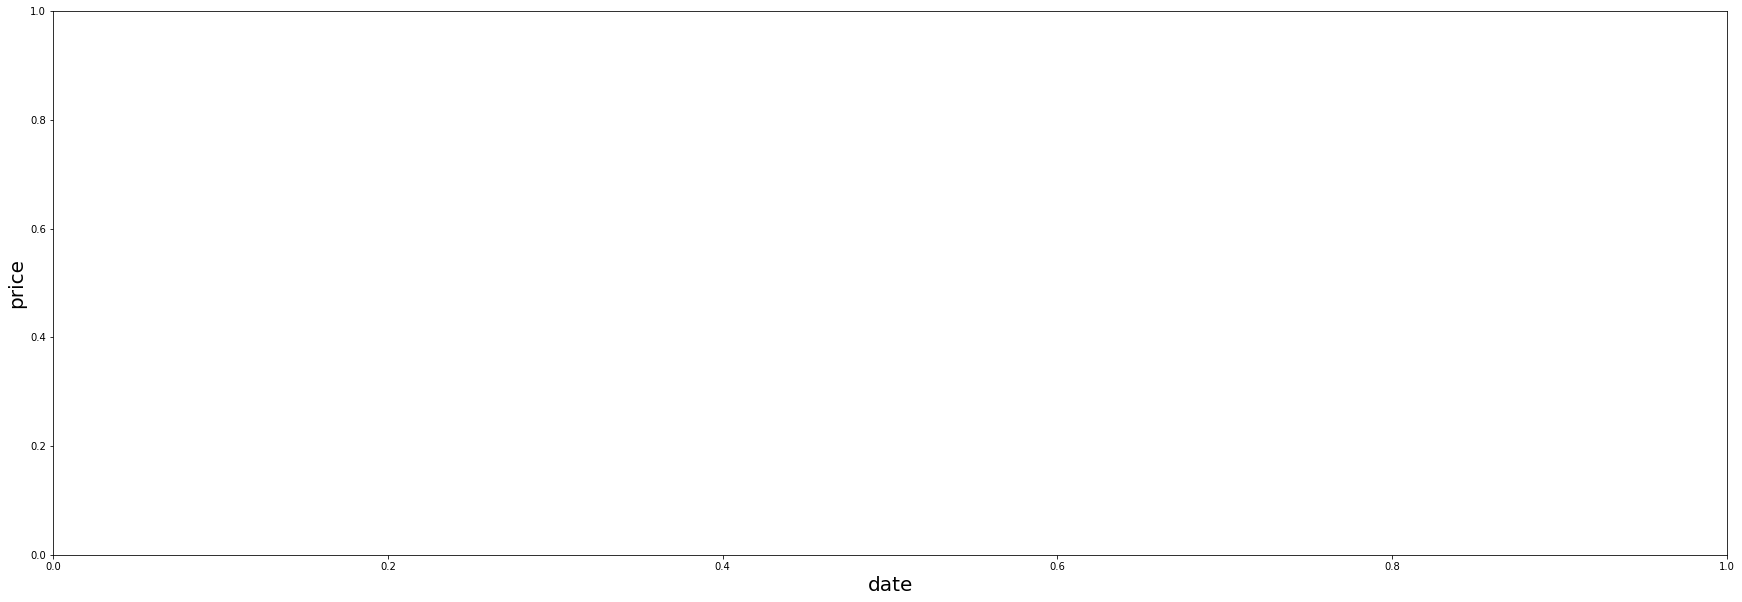

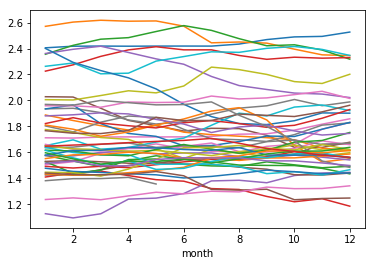

In [14]:
#PIVOT TABLE
plt.figure(figsize=(30,10))
plt.xlabel('date',size=20)
plt.ylabel('price',size=20)
mnth=mnth.to_frame()

mnth.name = 'DEXUSUK'
mnth['month'] = mnth.index.month
mnth['Year'] = mnth.index.year
piv = pd.pivot_table(mnth, index=['month'],columns=['Year'], values=['DEXUSUK'])

piv.plot()
plt.gca().legend_.remove()


piv

In [15]:
monthn=mnth

DEXUSUK                                                              \
month        1         2         3         4         5         6         7    
Year                                                                          
1971   2.405306  2.417670  2.418794  2.417697  2.418616  2.418887  2.418500   
1972   2.570852  2.603583  2.617787  2.610347  2.612390  2.572123  2.443723   
1973   2.355758  2.424311  2.471742  2.483657  2.530929  2.576414  2.539668   
1974   2.225565  2.274170  2.339452  2.389333  2.413645  2.389700  2.389748   
1975   2.361471  2.393898  2.417558  2.369400  2.320169  2.278792  2.184587   
1976   2.028460  2.025891  1.939694  1.846057  1.804787  1.763817  1.784994   
1977   1.711874  1.709714  1.717390  1.718980  1.718345  1.719120  1.722623   
1978   1.934934  1.939271  1.905794  1.848983  1.818002  1.836303  1.893844   
1979   2.005724  2.003357  2.037603  2.074217  2.058156  2.110947  2.256456   
1980   2.262881  2.288181  2.204923  2.209883  2.302903  2.337907  2.374397   
1981   2.400552  2.293265  2.229898  2.173867  2.088581  1.970270  1.875213   
1982   1.887500  1.845146  1.804935  1.771573  1.809313  1.755280  1.736063   
1983   1.576245  1.532482  1.489745  1.534616  1.573291  1.548587  1.526416   
1984   1.409610  1.441497  1.455306  1.420433  1.389061  1.377516  1.320427   
1985   1.126968  1.094409  1.126252  1.239227  1.247090  1.282323  1.379505   
1986   1.425685  1.426554  1.466452  1.498687  1.519518  1.508681  1.507100   
1987   1.504630  1.527531  1.592005  1.631653  1.664829  1.627007  1.608884   
1988   1.803132  1.757224  1.832197  1.879469  1.868849  1.777120  1.703961   
1989   1.775305  1.753286  1.713977  1.699470  1.627423  1.553707  1.622558   
1990   1.651466  1.696029  1.624335  1.637017  1.679035  1.709308  1.808309   
1991   1.934319  1.964814  1.820923  1.745593  1.723006  1.649950  1.652202   
1992   1.810116  1.778222  1.723863  1.756847  1.809710  1.856933  1.917965   
1993   1.527900  1.438739  1.462471  1.544077  1.548716  1.507560  1.495125   
1994   1.491842  1.479029  1.492277  1.481873  1.504610  1.526340  1.545932   
1995   1.574128  1.572332  1.599397  1.608007  1.587835  1.595113  1.595190   
1996   1.529942  1.536514  1.526897  1.516037  1.514390  1.542417  1.552856   
1997   1.661034  1.623425  1.610894  1.629073  1.631040  1.645429  1.671494   
1998   1.635637  1.640082  1.661783  1.671687  1.638313  1.650310  1.644400   
1999   1.650203  1.626850  1.621123  1.608833  1.614374  1.595590  1.574956   
2000   1.637935  1.598683  1.579516  1.581483  1.507352  1.509220  1.507795   
2001   1.477171  1.452779  1.444743  1.435129  1.426642  1.402398  1.414351   
2002   1.433006  1.423514  1.423771  1.443133  1.460177  1.484367  1.555390   
2003   1.616426  1.609918  1.581329  1.573070  1.622726  1.660250  1.624252   
2004   1.821681  1.866662  1.825355  1.804613  1.788071  1.828020  1.844468   
2005   1.880377  1.889186  1.904116  1.895846  1.853604  1.817797  1.752484   
2006   1.766452  1.747175  1.744448  1.768637  1.869706  1.844420  1.845335   
2007   1.958587  1.958082  1.947302  1.987521  1.983784  1.986339  2.033549   
2008   1.969395  1.963479  2.000132  1.982630  1.965715  1.968128  1.988284   
2009   1.446664  1.443418  1.416647  1.471073  1.546203  1.636017  1.636690   
2010   1.615058  1.557861  1.505513  1.533377  1.468235  1.476340  1.529794   
2011   1.578500  1.612546  1.615784  1.637382  1.634185  1.621640  1.615642   
2012   1.551640  1.580548  1.582827  1.600552  1.591494  1.555112  1.559619   
2013   1.596592  1.549336  1.508742  1.532083  1.528945  1.547123  1.517471   
2014   1.646660  1.655789  1.662913  1.674517  1.683869  1.691682  1.706906   
2015   1.515451  1.532679  1.495854  1.495777  1.544235  1.558607  1.556506   
2016   1.440316  1.428231  1.426655  1.431776  1.451833  1.419023  1.314071   
2017   1.236240  1.248775  1.234461  1.263853  1.292248  1.280013  1.300105   
2018   1.381179  1.396714  1.397470  1.406754  1.355690   

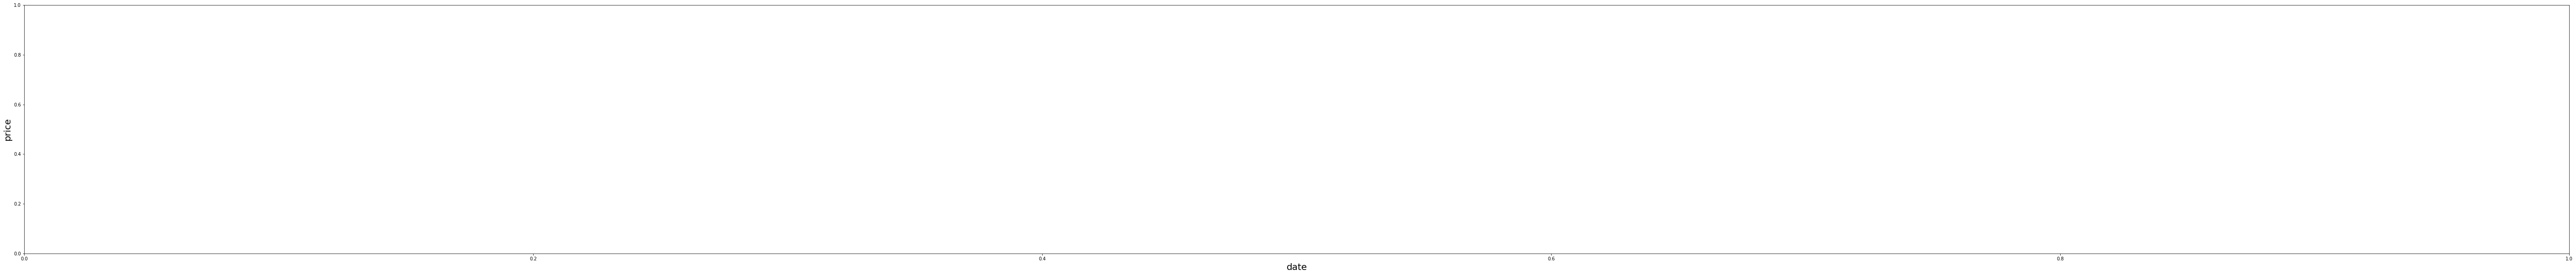

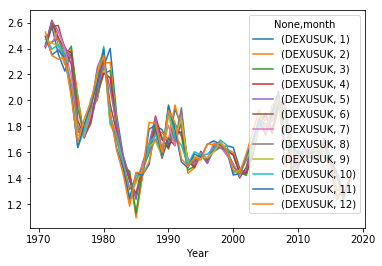

In [16]:
plt.figure(figsize=(100,10))
plt.xlabel('date',size=20)
plt.ylabel('price',size=20)

mnth.name = 'DEXUSUK'
mnth['month'] = mnth.index.month
mnth['Year'] = mnth.index.year
piv1 = pd.pivot_table(mnth, index=['Year'],columns=['month'], values=['DEXUSUK'])

piv1.plot()


piv1

In [17]:
corr1 = piv1.corr(method='pearson', min_periods=1)
print(corr1)

                DEXUSUK                                                    \
month                1         2         3         4         5         6    
        month                                                               
DEXUSUK 1      1.000000  0.994761  0.984770  0.972154  0.955291  0.930270   
        2      0.994761  1.000000  0.991960  0.978722  0.965064  0.945389   
        3      0.984770  0.991960  1.000000  0.994131  0.980760  0.962061   
        4      0.972154  0.978722  0.994131  1.000000  0.991963  0.977398   
        5      0.955291  0.965064  0.980760  0.991963  1.000000  0.992197   
        6      0.930270  0.945389  0.962061  0.977398  0.992197  1.000000   
        7      0.901466  0.918487  0.931433  0.950505  0.967574  0.986097   
        8      0.891066  0.909473  0.917497  0.936475  0.956393  0.976366   
        9      0.885385  0.903432  0.910347  0.929474  0.950831  0.968611   
        10     0.860165  0.878269  0.885471  0.906004  0.926187  0.943861   

Text(33,0.5,'Months')

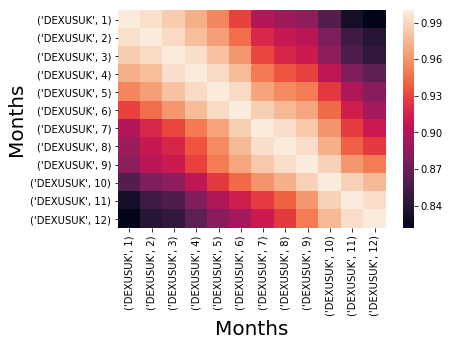

In [18]:
#heatmap for correlation between different months
import seaborn as sns
%matplotlib inline


# plot the heatmap
sns.heatmap(corr1, 
        xticklabels=corr1.columns,
        yticklabels=corr1.columns)
plt.xlabel('Months',size=20)
plt.ylabel('Months',size=20)

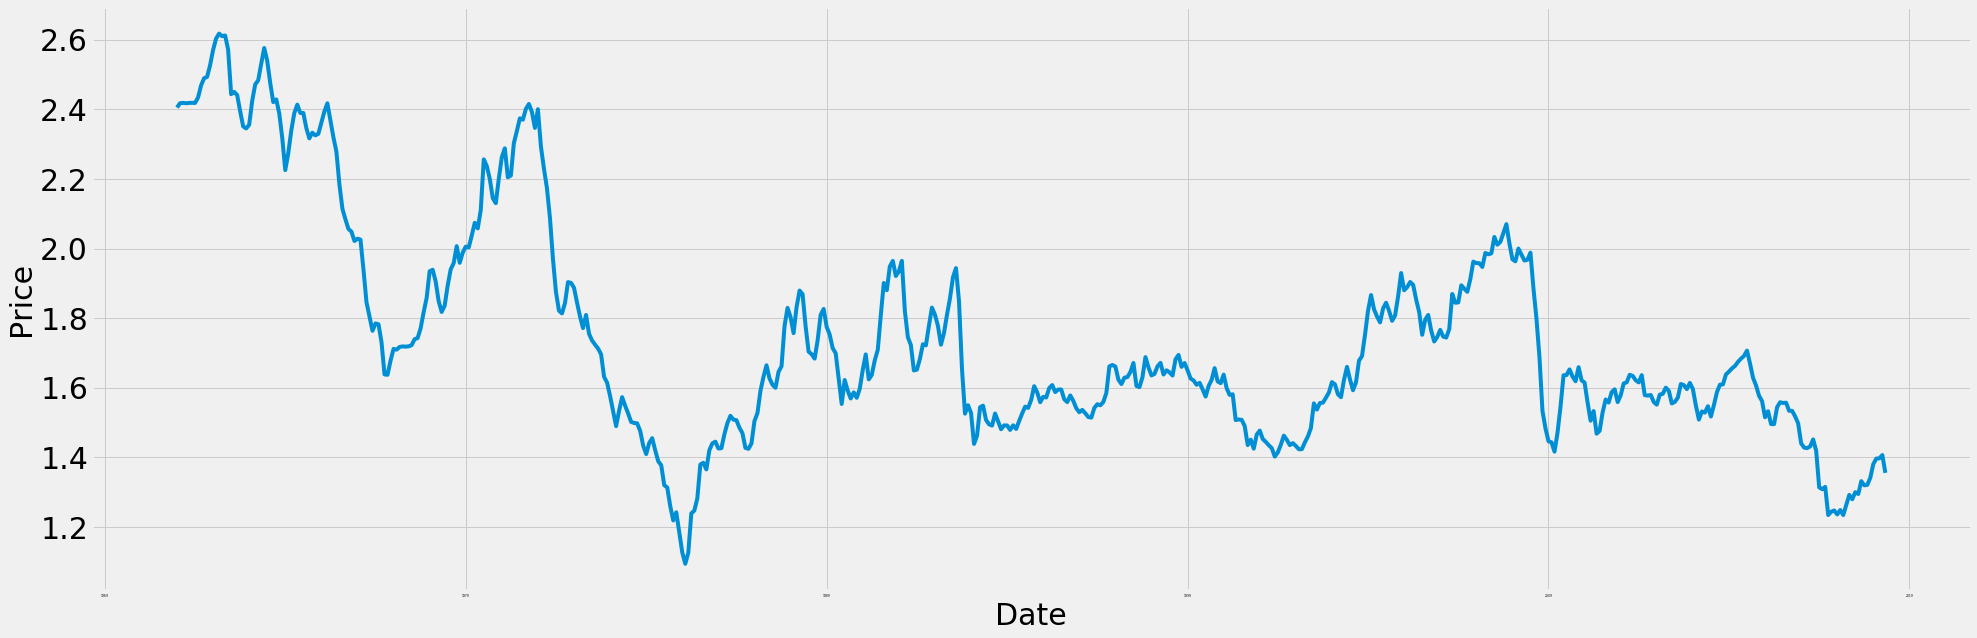

In [42]:
mnth1=s.groupby( pd.Grouper( freq='M')).mean()
plt.figure(figsize=(30,10))
plt.xlabel('Date',size=30)
plt.ylabel('Price',size=30)
mnth1.plot()
plt.tick_params(axis='x', which='major', labelsize=3)
plt.tick_params(axis='y', which='major', labelsize=30)

In [20]:
x=mnth1.values

### Mann-Kendall Test

In [21]:
 from scipy.stats import norm

n = len(x)
s2 = 0
for k in range(n-1):
    for j in range(k+1, n):
        s2 += np.sign(x[j] - x[k])

    # calculate the unique data
unique_x = np.unique(x)
g = len(unique_x)

    # calculate the var(s)
if n == g:  # there is no tie
    var_s = (n*(n-1)*(2*n+5))/18
else:  # there are some ties in data
    tp = np.zeros(unique_x.shape)
    for i in range(len(unique_x)):
        tp[i]= sum(x== unique_x[i])
    var_s = (n*(n-1)*(2*n+5) - np.sum(tp*(tp-1)*(2*tp+5)))/18

if s2 > 0:
    z = (s2 - 1)/np.sqrt(var_s)
elif s2 < 0:
    z = (s2 + 1)/np.sqrt(var_s)
else: # s == 0:
    z = 0

    # calculate the p_value
p = 2*(1-norm.cdf(abs(z)))  # two tail test
h = abs(z) > norm.ppf(1-0.05/2)

if (z < 0) and h:
    trend = 'decreasing'
elif (z > 0) and h:
     trend = 'increasing'
else:
    trend = 'no trend'

print(trend)
print(h)
print(p)
print(z)



decreasing
True
0.0
-12.877804177172939


      Seasonal Decomposition

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


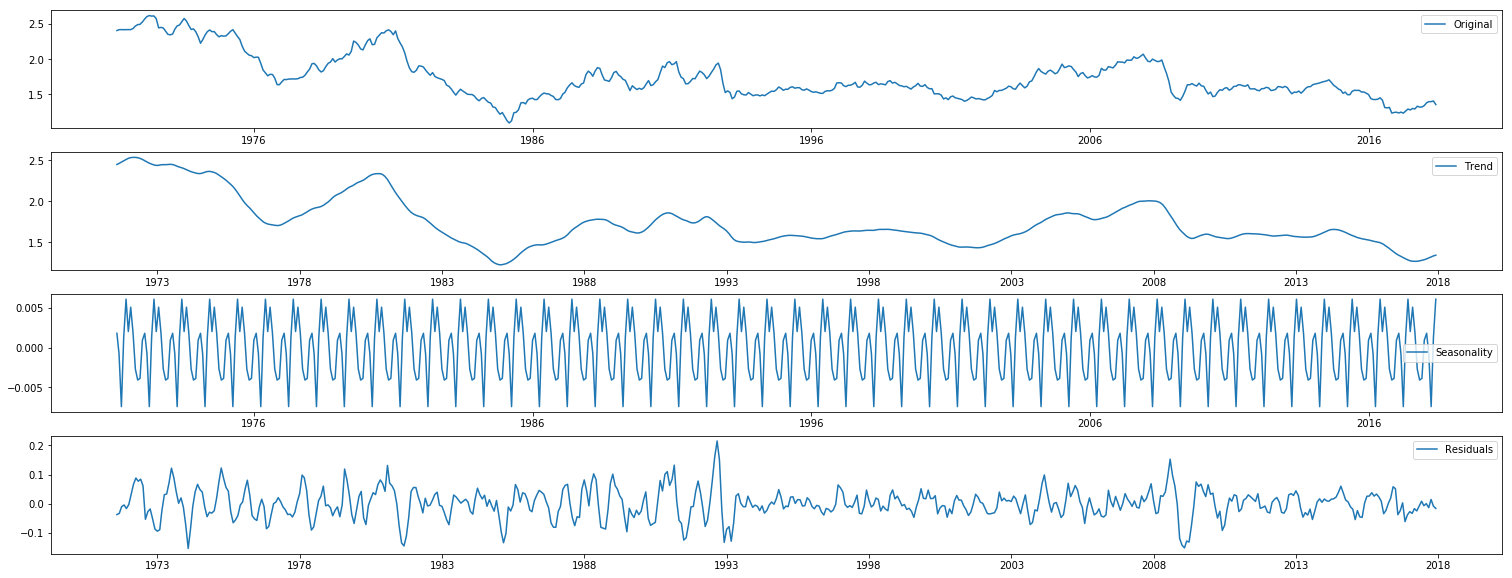

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(mnth1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.figure(figsize=(26,10))
plt.subplot(411)
plt.plot(mnth1, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

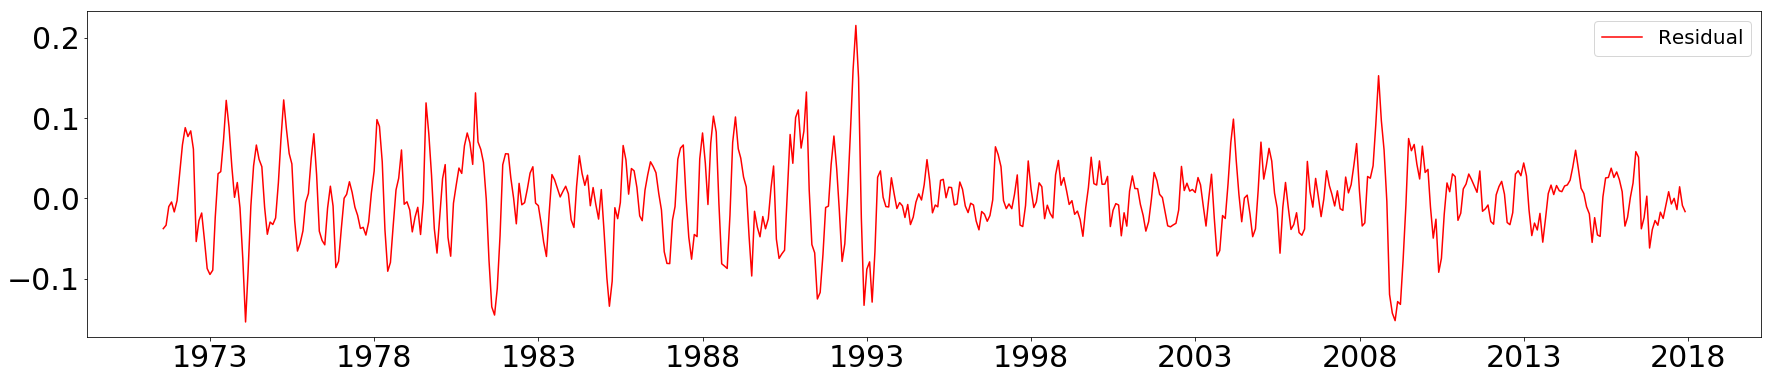

In [23]:
plt.figure(figsize=(30,6))
plt.plot(residual,label='Residual',color='r')
plt.legend(loc='best', prop={'size':20})
plt.tick_params(axis='both', which='major', labelsize=30)